classification 0
image found of classification: 0 -


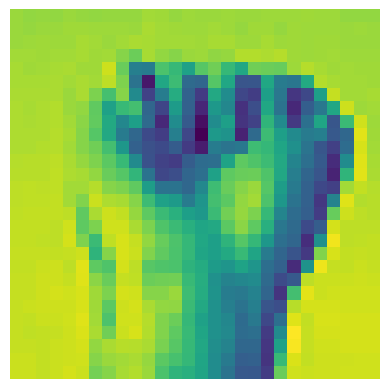

classification 1
image found of classification: 1 -


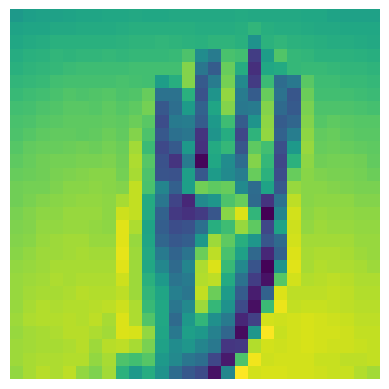

classification 2
image found of classification: 2 -


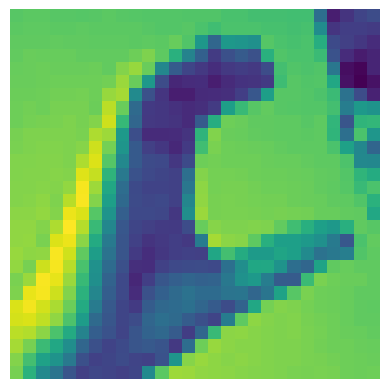

classification 3
image found of classification: 3 -


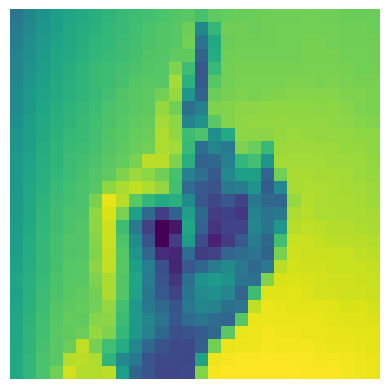

classification 4
image found of classification: 4 -


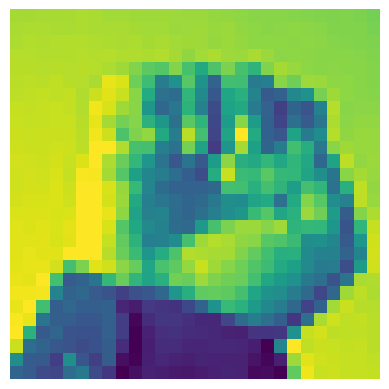

classification 5
image found of classification: 5 -


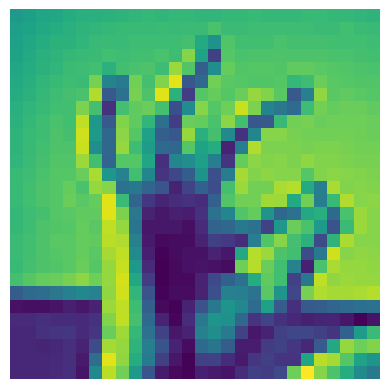

classification 6
image found of classification: 6 -


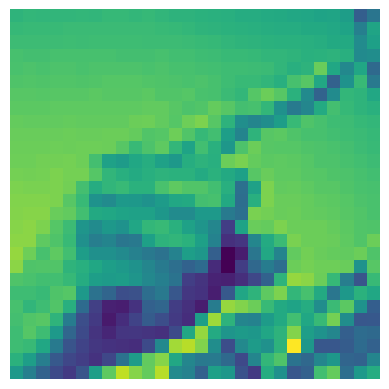

classification 7
image found of classification: 7 -


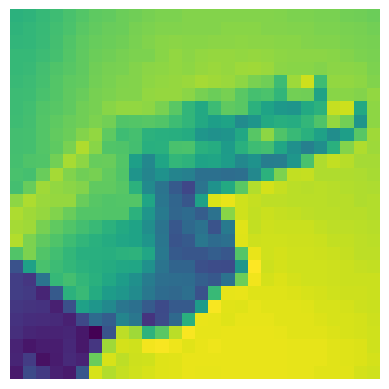

classification 8
image found of classification: 8 -


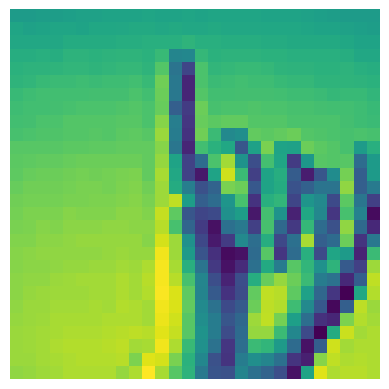

classification 9
for classification: 9 no suitable image found
classification 10
image found of classification: 10 -


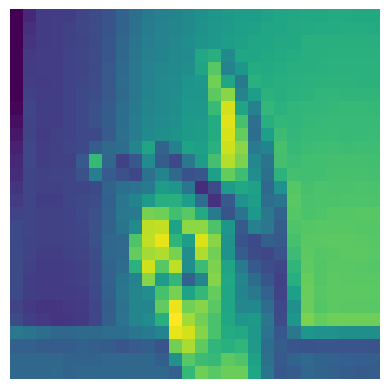

classification 11
image found of classification: 11 -


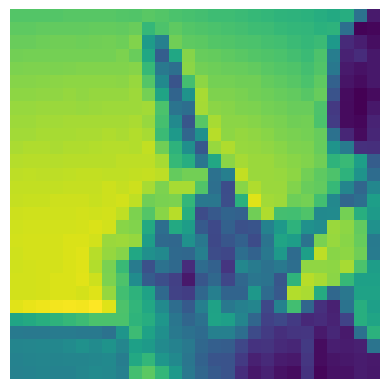

classification 12
image found of classification: 12 -


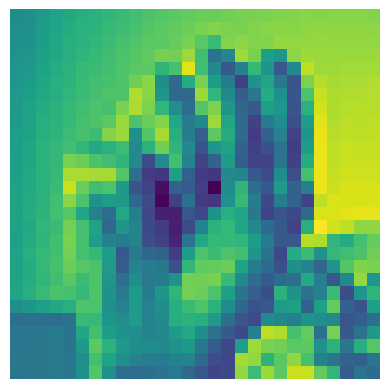

classification 13
image found of classification: 13 -


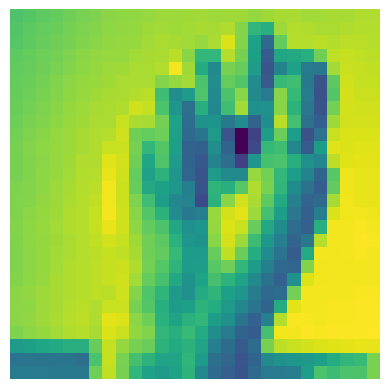

classification 14
image found of classification: 14 -


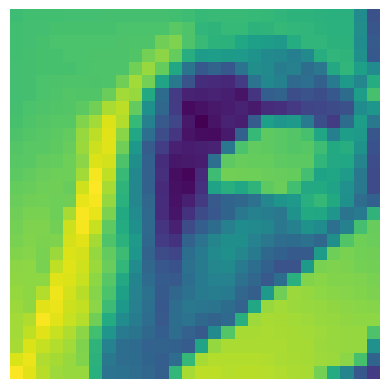

classification 15
image found of classification: 15 -


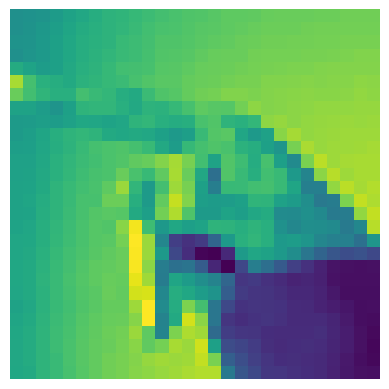

classification 16
image found of classification: 16 -


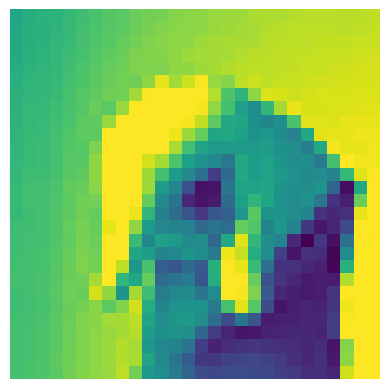

classification 17
image found of classification: 17 -


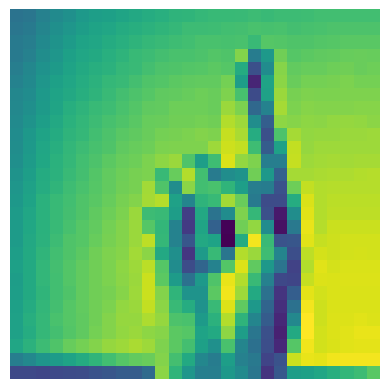

classification 18
image found of classification: 18 -


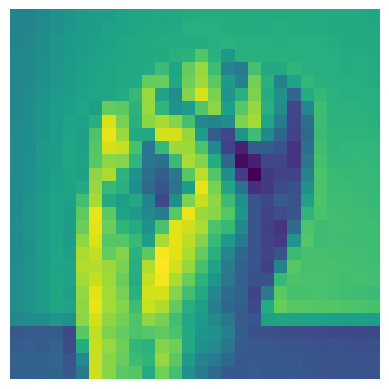

classification 19
image found of classification: 19 -


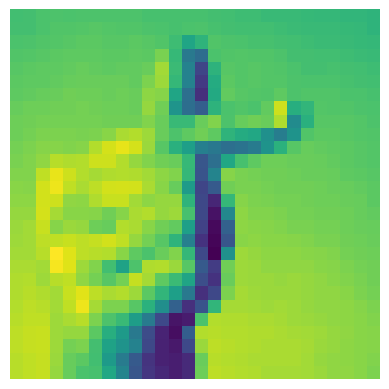

classification 20
image found of classification: 20 -


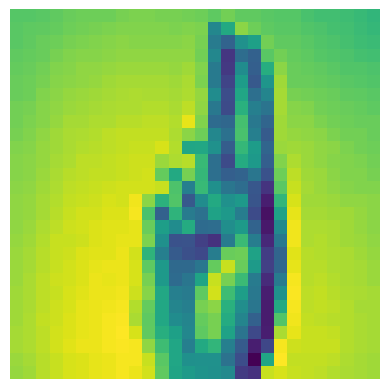

classification 21
image found of classification: 21 -


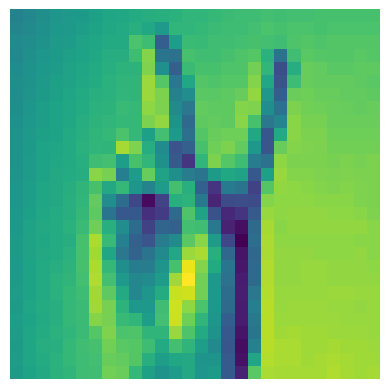

classification 22
image found of classification: 22 -


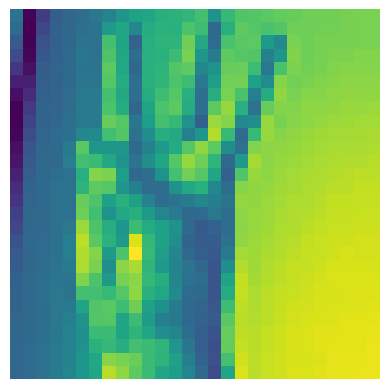

classification 23
image found of classification: 23 -


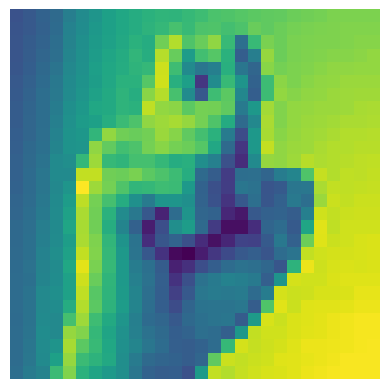

classification 24
image found of classification: 24 -


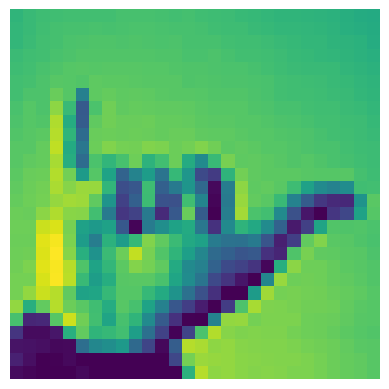

classification 25
for classification: 25 no suitable image found


In [82]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import array
import statistics
import math
from numpy.linalg import inv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
%matplotlib inline


with open('TrainData.pkl', 'rb') as f:
    TrainData = pickle.load(f)
#Q1-function+call
#a- Load the data: TrainData.pkl
#b- display the each image and it's classification
for i in range (26):
    print("classification", i)
    index=np.where(TrainData['Y']==i)
    if(len(index[0])==0):
        print("for classification:",i, "no suitable image found")
    else:
        print("image found of classification:", i, "-")
        im=TrainData['X'][:,:,index[0][0]]
        plt.imshow(im)
        plt.axis('off')
        plt.show()

#c- reshaping data
reshaped_TrainData=TrainData['X'].reshape(784,27455)
reshaped_TrainData=np.transpose(reshaped_TrainData)
#print(reshaped_TrainData[1,:])

In [83]:
#Q1-function
def Q1 (TrainData):
    #b- display the each image and it's classification
    for i in range (26):
        print("classification", i)
        index=np.where(TrainData['Y']==i)
        if(len(index[0])==0):
            print("for classification:",i, "no suitable image found")
        else:
            print("image found of classification:", i, "-")
            im=TrainData['X'][:,:,index[0][0]]
            plt.imshow(im)
            plt.axis('off')
            plt.show()
    #c- reshaping data
    reshaped_TrainData=TrainData['X'].reshape(784,27455)
    reshaped_TrainData=np.transpose(reshaped_TrainData)
    #print(reshaped_TrainData[1,:])

In [84]:
#Q1b-function
def Q1b (TestData):
    #b- display the each image and it's classification
    for i in range (26):
        print("classification", i)
        index=np.where(TestData['Y']==i)
        if(len(index[0])==0):
            print("for classification:",i, "no suitable image found")
        else:
            print("image found of classification:", i, "-")
            im=TestData['X'][:,:,index[0][0]]
            plt.imshow(im)
            plt.axis('off')
            plt.show()
    #c- reshaping data
    reshaped_TrainData=TestData['X'].reshape(784,len(TestData['Y']))
    reshaped_TrainData=np.transpose(reshaped_TrainData)
    #print(reshaped_TrainData[1,:])

In [85]:
def reshape_Data (TrainData):
    new_len=len(TrainData['X'][0,0,:])
    reshaped_TrainData=TrainData['X'].reshape(784,new_len)
    reshaped_TrainData=np.transpose(reshaped_TrainData)
    return reshaped_TrainData

In [86]:
#Q3-function
#a-compute maximum likelihood values
def ML_computation (TrainData):
    reshaped_TrainData=TrainData['X'].reshape(784,27455)
    reshaped_TrainData=np.transpose(reshaped_TrainData)
    mat= np.zeros((784))
    sigma=np.float64(np.zeros((26,784,784)))
    mu= np.zeros((26,1,784))
    pi=np.zeros((26))
    for i in range (26):
        index=np.where(TrainData['Y']==i)
        pi[i]=((len(index[0])/len(TrainData['Y'])))
        if (len(index[0])!=0):
            for j in range (len(index[0])):
                mat+=reshaped_TrainData[index[0][j]]
            mat=mat/len(index[0])
            mu[i,:,:]=mat
            mat=np.zeros((784))
            for k in range (len(index[0])):
                sigma[i,:,:]+=(((reshaped_TrainData[index[0][k],:]-mu[i,:,:]).T)@((reshaped_TrainData[index[0][k],:]-mu[i,:,:])))/len(index[0])
    return pi, mu, sigma


In [87]:
#Q3-function
#b-compute classification
def ML_classification_computation (pi, mu, sigma, X):
    y_class=np.zeros((26))
    y=np.zeros((len(X[:,0])))
    lamda=np.zeros((26))
    sigma=np.float64(sigma)
    a=np.zeros((26))
    inv_sig=np.zeros((26,784,784))
    for k in range (len(y_class)):
        if not(np.all(sigma[k,:,:]) == 0):
            temp_lamda=np.zeros((784))
            temp_lamda=np.linalg.eigvals(sigma[k,:,:])
            temp_lamda=abs(temp_lamda)
            temp_lamda=np.log(temp_lamda)
            lamda[k]=np.sum(temp_lamda)
        else:
            lamda[k]=0
    for p in range(len(y_class)):
        a[p],b=np.linalg.slogdet(sigma[p,:,:])
        if(a[p]!= 0):
            inv_sig[p,:,:]=np.linalg.inv(sigma[p,:,:])
    for j in range (len(X[:,0])):
        y_class=(np.ones((26)))*(-10000000000000)
        for i in range (len(y_class)):
            if(a[i]!= 0):
                y_class[i]=-1/2*(lamda[i])-(1/2*(X[j,:]-mu[i,:,:]))@inv_sig[i,:,:]@((X[j,:]-mu[i,:,:]).T)+math.log(pi[i])
        y[j]=np.array(y_class).argmax()
        #print('classification-', y[j])
        #print('real classification',M[j])
    return y 
      


In [88]:
#Q3-function
#c-mu vector display
def mu_display (mu):
    for i in range(26):
        print("avrage image of classification:", i, "-","leter:",chr(i+97))
        reshaped_mu=mu[i,:,:].reshape(28,28)
        im=reshaped_mu[:,:]
        plt.imshow(im)
        plt.axis('off')
        plt.show() 


In [89]:
#Q4-function
#a- compputing classifier precision
def pc_calculation (y_pred,y_true):
    pc=np.sum(y_pred==y_true)
    pc=pc/len(y_pred)
    print("pc calculation:", pc)
    return pc

#b
def confusion_matrix_calculation (y_pred,y_true,a):
    confusion = confusion_matrix(y_true, y_pred,labels=a)
    print("confusion matrix:",confusion)
    return confusion

#c
def precision_and_recall_confusion (y_true,y_pred,a):
    precision = precision_score(y_true, y_pred,labels=a,average=None) 
    recall = recall_score(y_true, y_pred,labels=a,average=None) 
    for i in range (len(precision)):
        print("Precision of classification:",i, "is", precision[i])
        print("Recallof classification:",i,"is", recall[i])
    return precision,recall

In [90]:
def main ():
    #Q1
    Q1(TrainData)
    #Q2-attached Word file
    #Q3-call
    y=np.zeros((len(TrainData['X'][0,0,:])))
    pi, mu, sigma=ML_computation(TrainData)
    y=ML_classification_computation(pi, mu, sigma,reshape_Data(TrainData))
    mu_display(mu)
    #Q4
    a_array=np.linspace(0,25,26)
    print("for train serie")
    pc=pc_calculation (y,TrainData['Y'])
    confusion=confusion_matrix_calculation(y,TrainData['Y'],a_array)
    precision,recall=precision_and_recall_confusion(y,TrainData['Y'],a_array)
    #Q5
    #Load the data: TestData.pkl
    with open('TestData.pkl', 'rb') as f2:
        TestData = pickle.load(f2)
    y=ML_classification_computation(pi, mu, sigma,reshape_Data(TestData))
    print("display for test serie")
    Q1b(TestData)
    print("for test serie")
    pc=pc_calculation (y,TestData['Y'])
    confusion=confusion_matrix_calculation(y,TestData['Y'],a_array)
    precision,recall=precision_and_recall_confusion(y,TestData['Y'],a_array)
    #6
    with open('MessageData.pkl', 'rb') as f3:
        MessageData = pickle.load(f3)
    y=ML_classification_computation(pi, mu, sigma,reshape_Data(MessageData))
    y_char=np.chararray(len(y))
    for x in range (len(y)):
        if (not np.any(MessageData['X'][:,:,x])):
            y[x]=-65
    y=y+97
    y=np.array([int(a) for a in y]) 
    ascii_string = ''.join([chr(i) for i in y])        
    print(ascii_string)

    

classification 0
image found of classification: 0 -


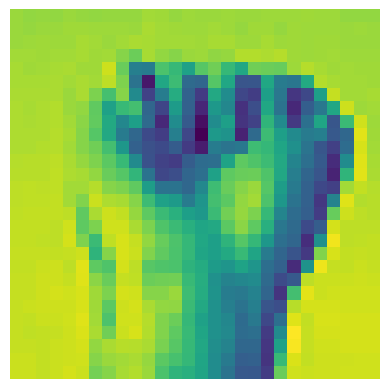

classification 1
image found of classification: 1 -


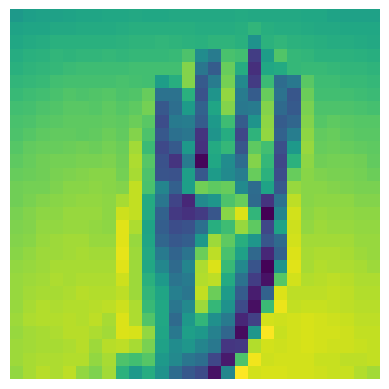

classification 2
image found of classification: 2 -


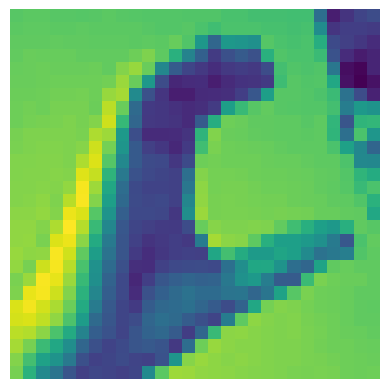

classification 3
image found of classification: 3 -


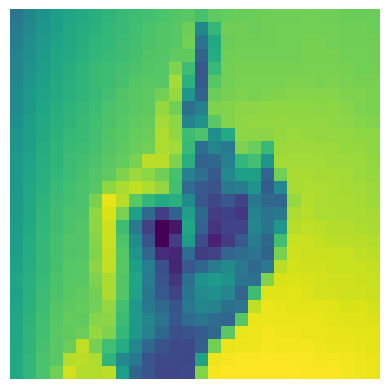

classification 4
image found of classification: 4 -


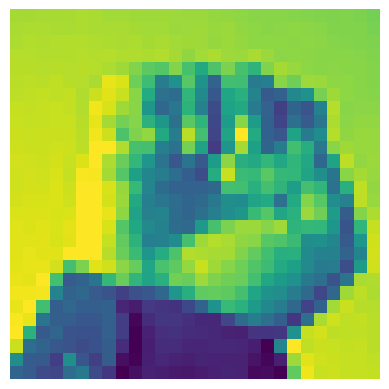

classification 5
image found of classification: 5 -


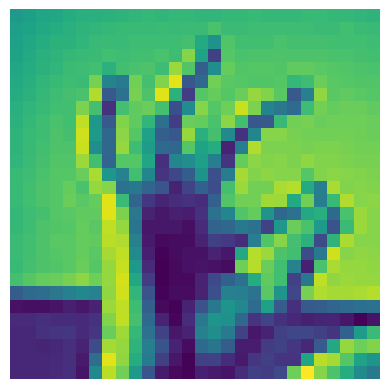

classification 6
image found of classification: 6 -


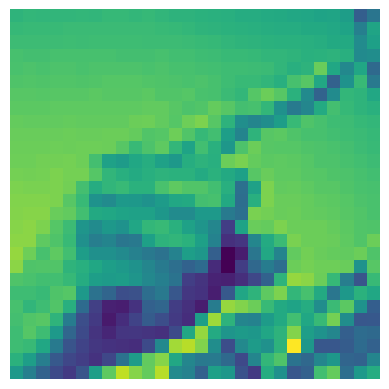

classification 7
image found of classification: 7 -


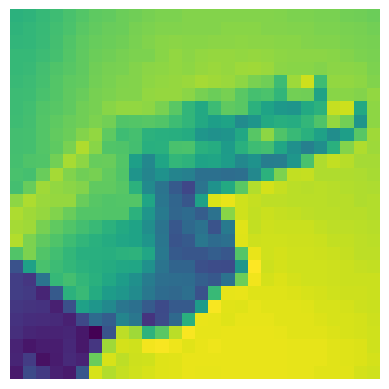

classification 8
image found of classification: 8 -


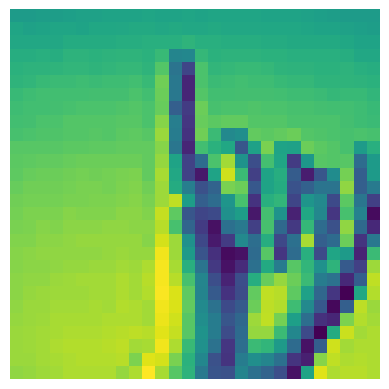

classification 9
for classification: 9 no suitable image found
classification 10
image found of classification: 10 -


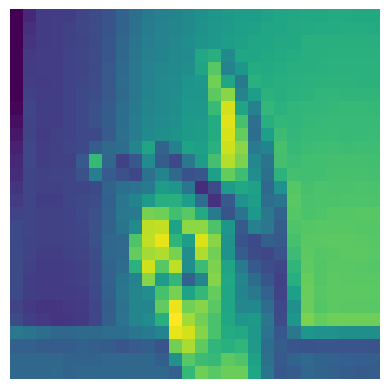

classification 11
image found of classification: 11 -


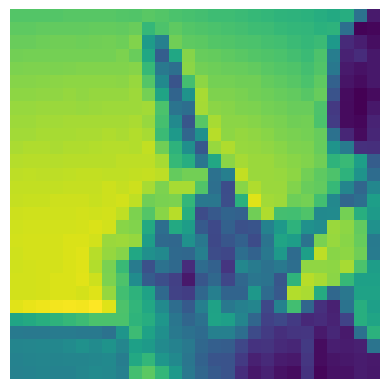

classification 12
image found of classification: 12 -


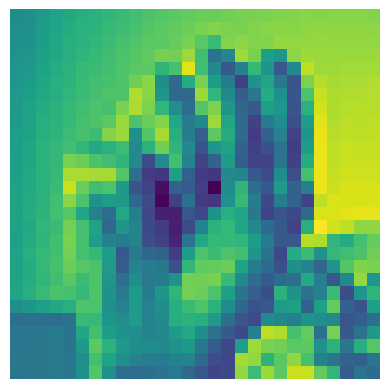

classification 13
image found of classification: 13 -


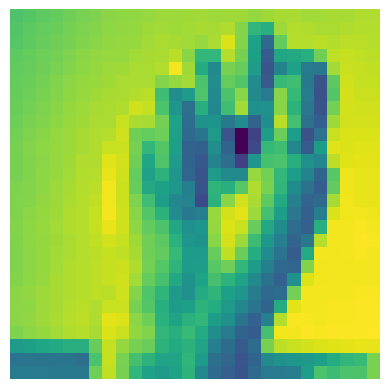

classification 14
image found of classification: 14 -


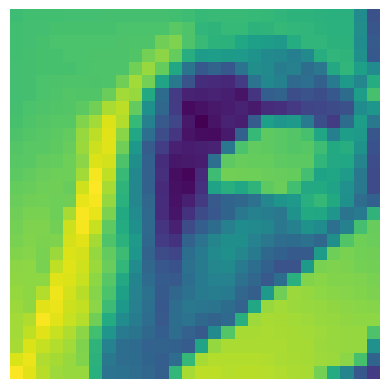

classification 15
image found of classification: 15 -


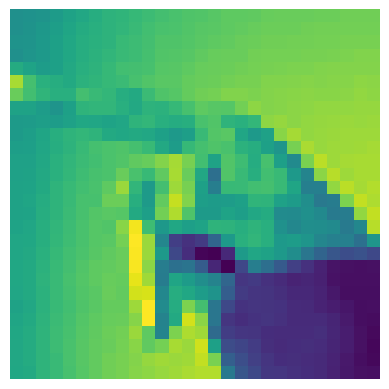

classification 16
image found of classification: 16 -


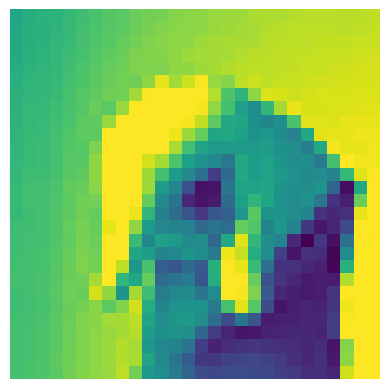

classification 17
image found of classification: 17 -


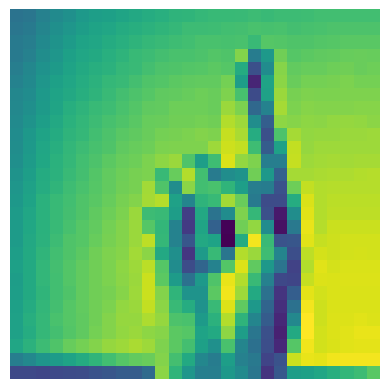

classification 18
image found of classification: 18 -


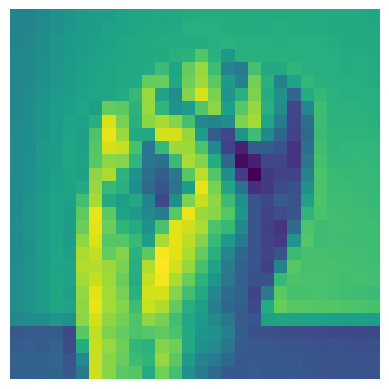

classification 19
image found of classification: 19 -


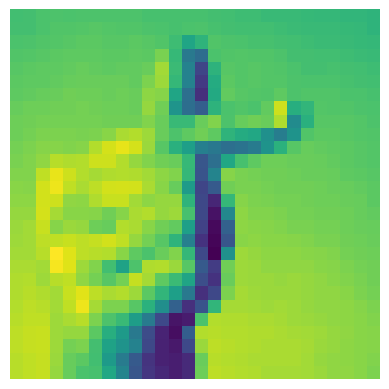

classification 20
image found of classification: 20 -


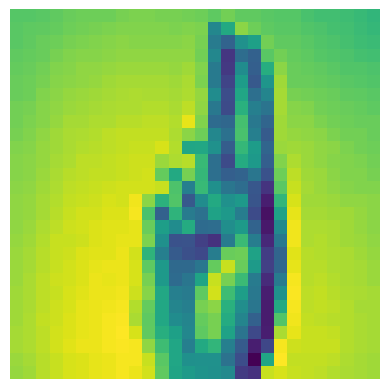

classification 21
image found of classification: 21 -


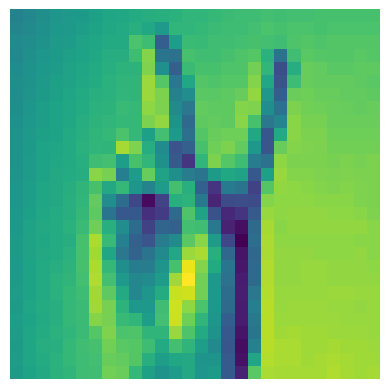

classification 22
image found of classification: 22 -


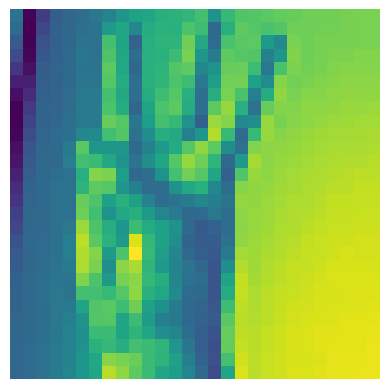

classification 23
image found of classification: 23 -


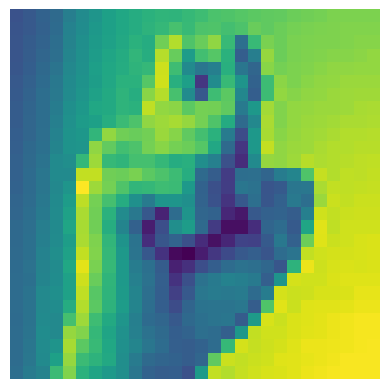

classification 24
image found of classification: 24 -


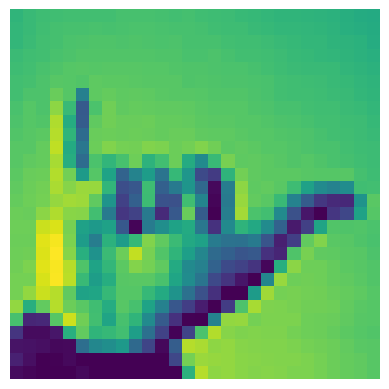

classification 25
for classification: 25 no suitable image found
avrage image of classification: 0 - leter: a


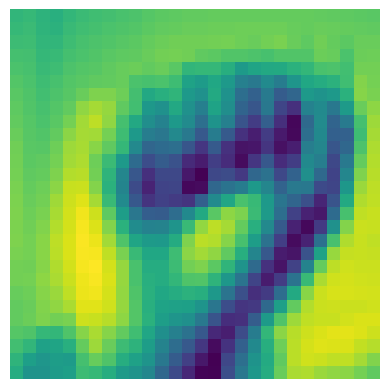

avrage image of classification: 1 - leter: b


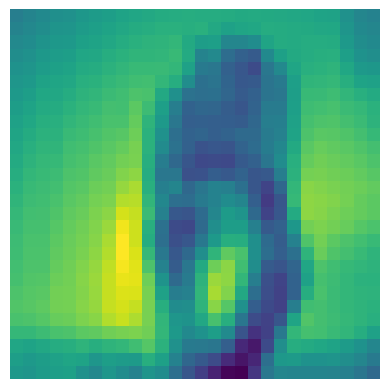

avrage image of classification: 2 - leter: c


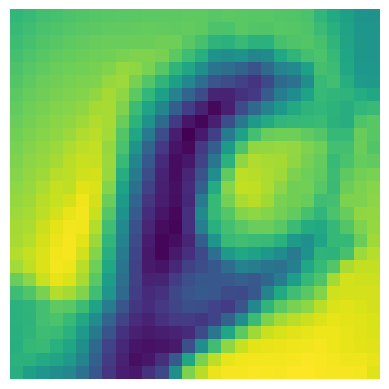

avrage image of classification: 3 - leter: d


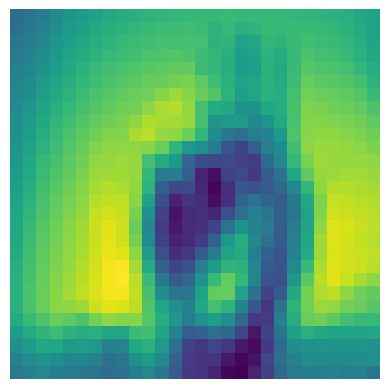

avrage image of classification: 4 - leter: e


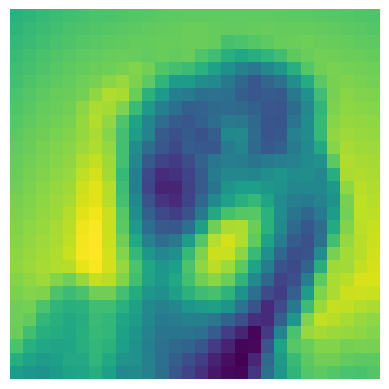

avrage image of classification: 5 - leter: f


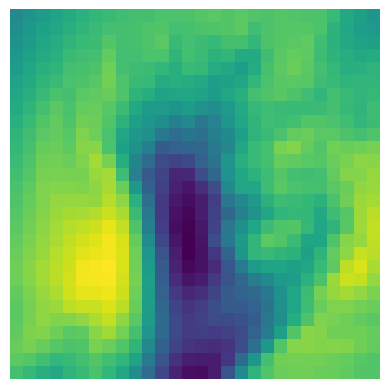

avrage image of classification: 6 - leter: g


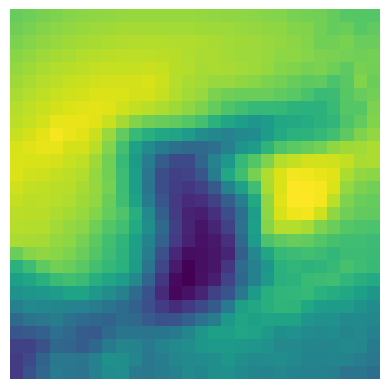

avrage image of classification: 7 - leter: h


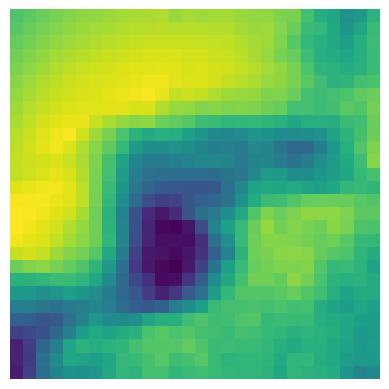

avrage image of classification: 8 - leter: i


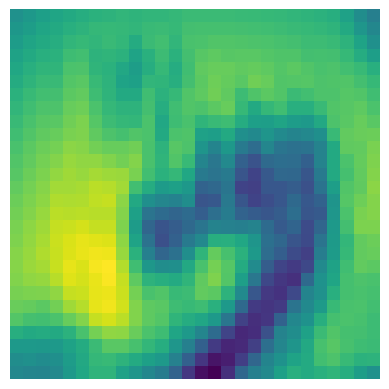

avrage image of classification: 9 - leter: j


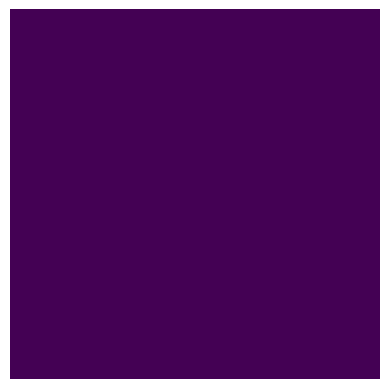

avrage image of classification: 10 - leter: k


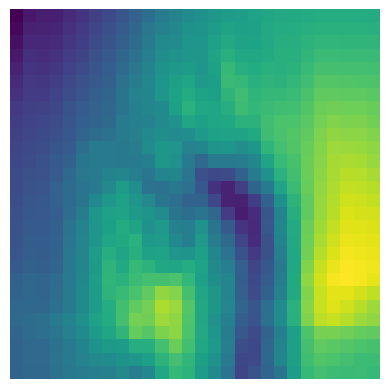

avrage image of classification: 11 - leter: l


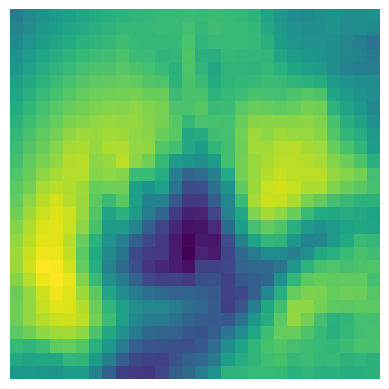

avrage image of classification: 12 - leter: m


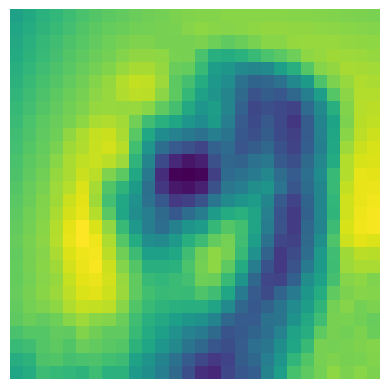

avrage image of classification: 13 - leter: n


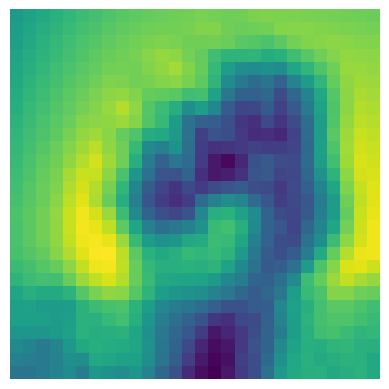

avrage image of classification: 14 - leter: o


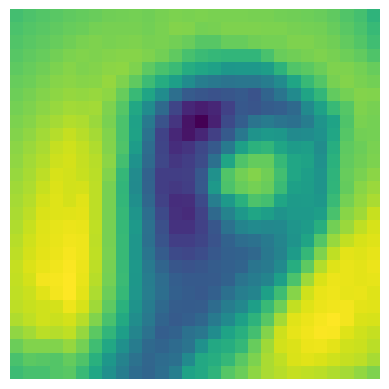

avrage image of classification: 15 - leter: p


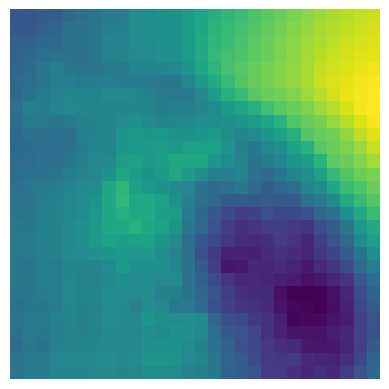

avrage image of classification: 16 - leter: q


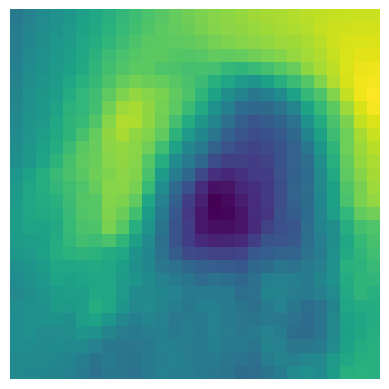

avrage image of classification: 17 - leter: r


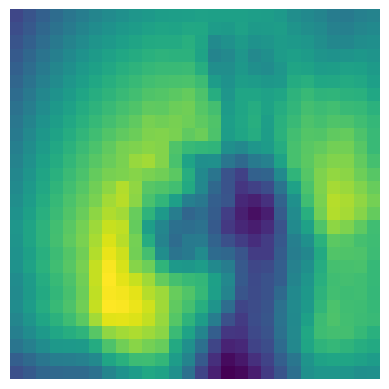

avrage image of classification: 18 - leter: s


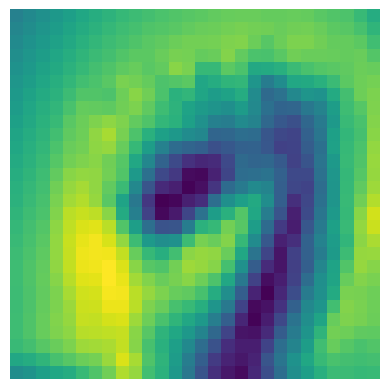

avrage image of classification: 19 - leter: t


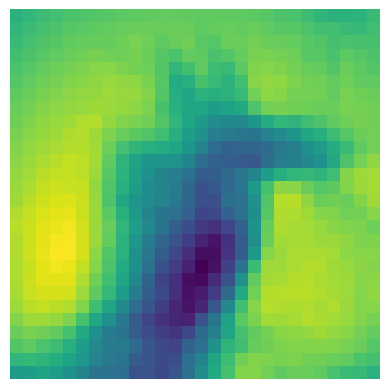

avrage image of classification: 20 - leter: u


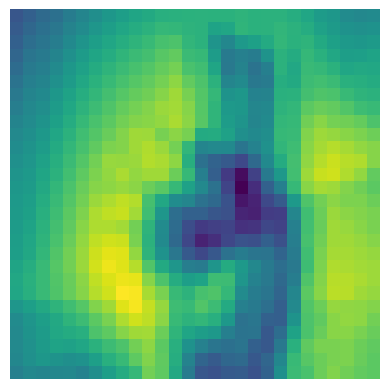

avrage image of classification: 21 - leter: v


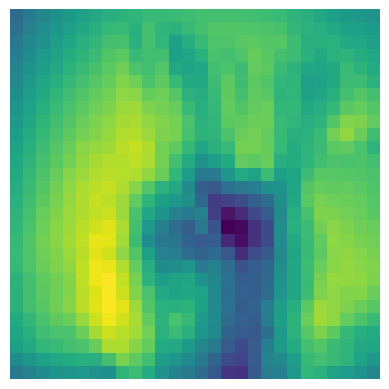

avrage image of classification: 22 - leter: w


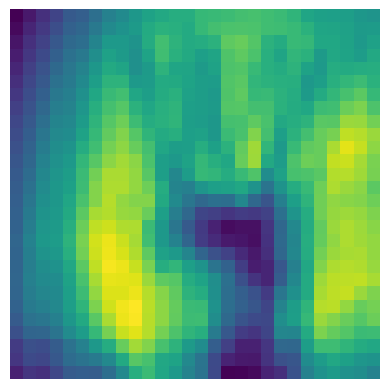

avrage image of classification: 23 - leter: x


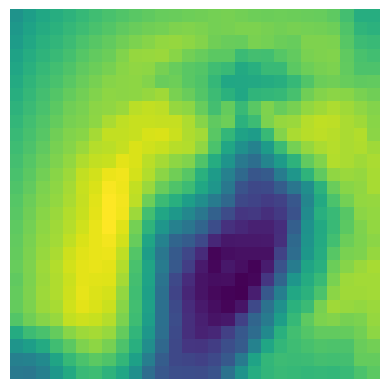

avrage image of classification: 24 - leter: y


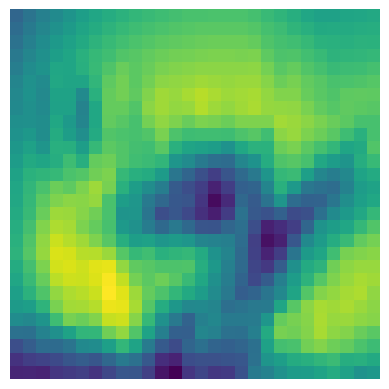

avrage image of classification: 25 - leter: z


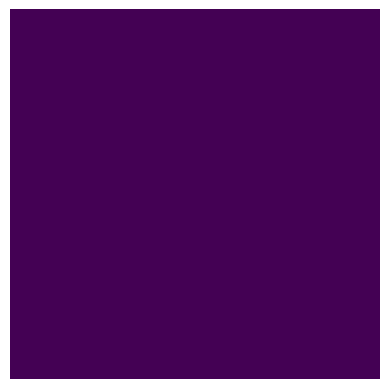

for train serie
pc calculation: 1.0
confusion matrix: [[1126    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 1144    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 1196    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0  957    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 1204    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 1090    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 

C:\Users\melen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\melen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification 0
image found of classification: 0 -


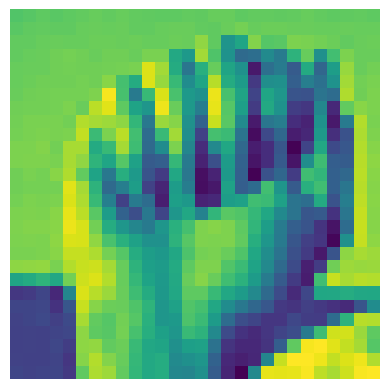

classification 1
image found of classification: 1 -


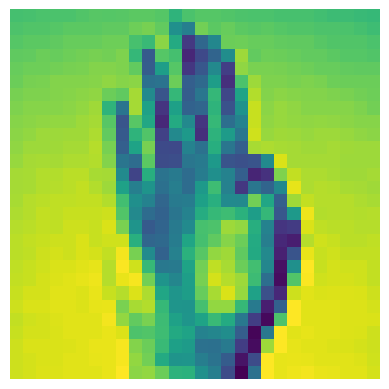

classification 2
image found of classification: 2 -


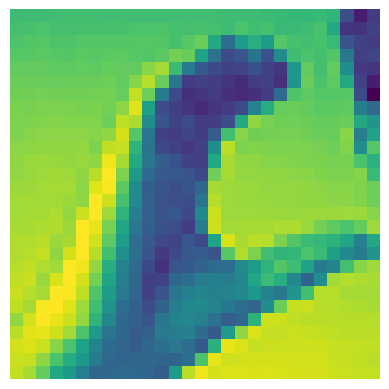

classification 3
image found of classification: 3 -


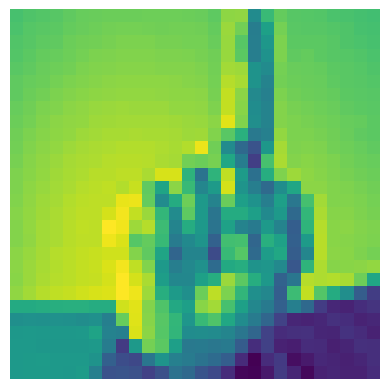

classification 4
image found of classification: 4 -


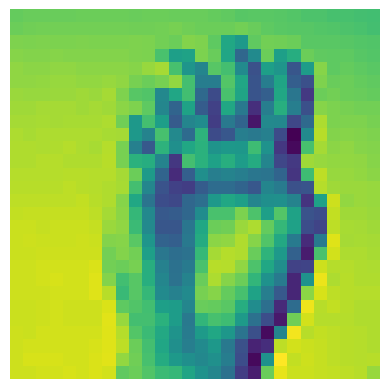

classification 5
image found of classification: 5 -


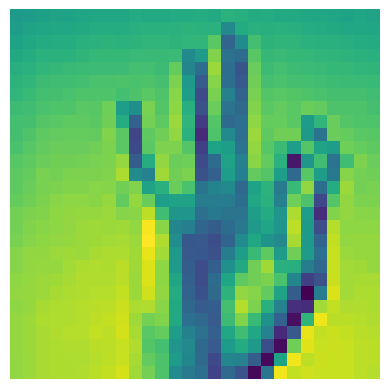

classification 6
image found of classification: 6 -


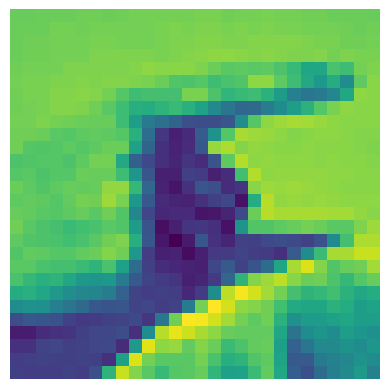

classification 7
image found of classification: 7 -


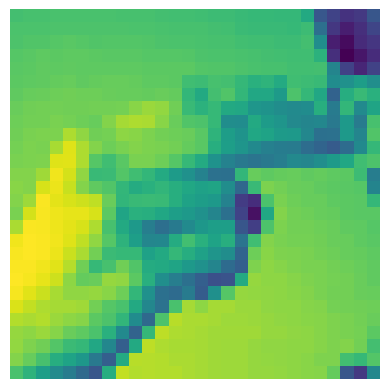

classification 8
image found of classification: 8 -


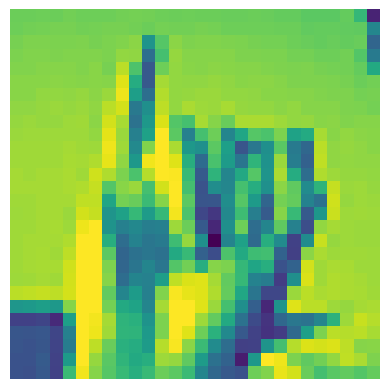

classification 9
for classification: 9 no suitable image found
classification 10
image found of classification: 10 -


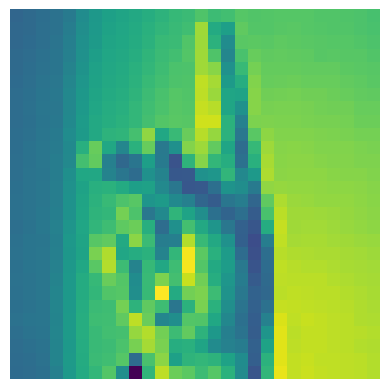

classification 11
image found of classification: 11 -


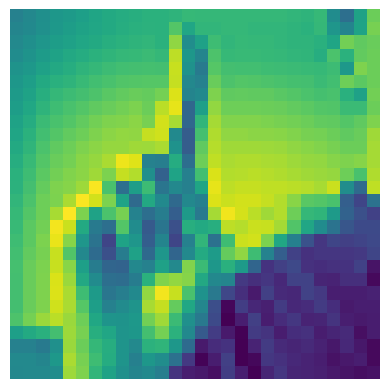

classification 12
image found of classification: 12 -


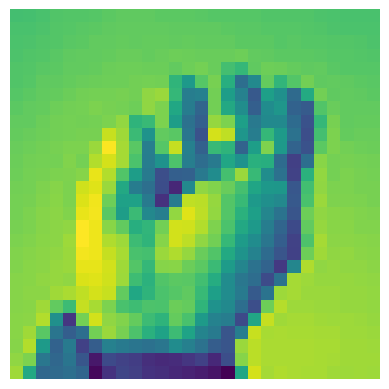

classification 13
image found of classification: 13 -


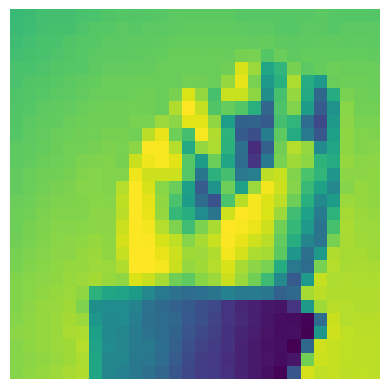

classification 14
image found of classification: 14 -


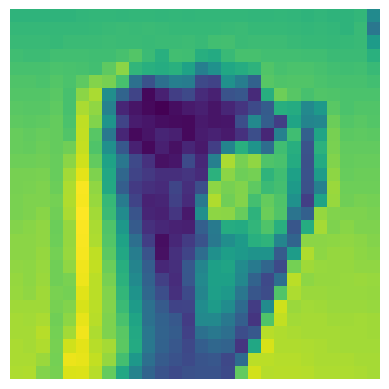

classification 15
image found of classification: 15 -


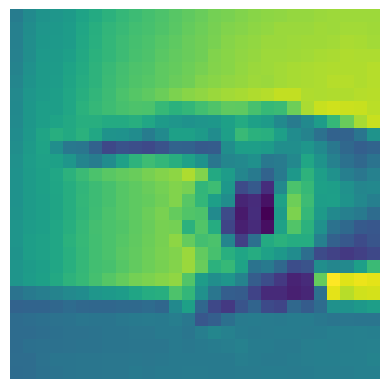

classification 16
image found of classification: 16 -


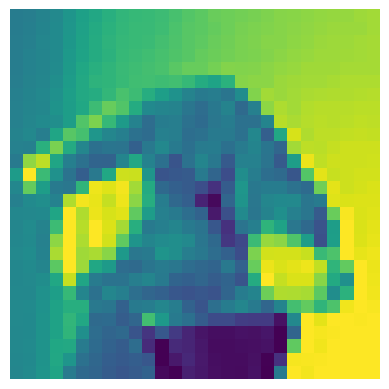

classification 17
image found of classification: 17 -


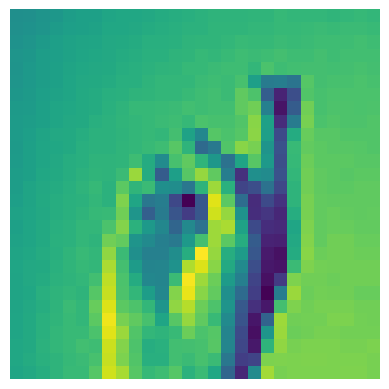

classification 18
image found of classification: 18 -


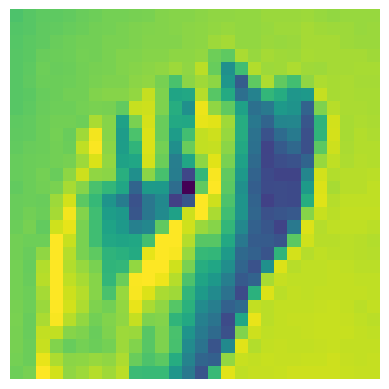

classification 19
image found of classification: 19 -


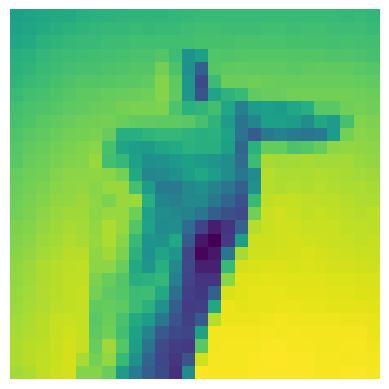

classification 20
image found of classification: 20 -


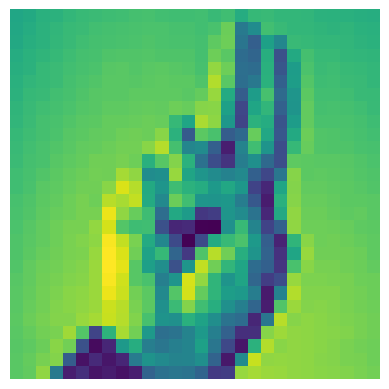

classification 21
image found of classification: 21 -


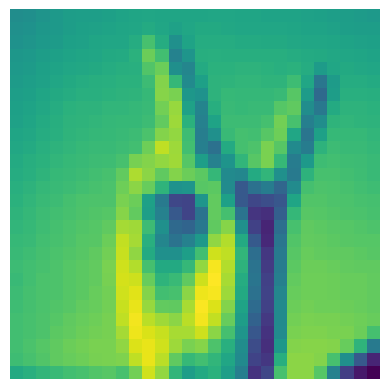

classification 22
image found of classification: 22 -


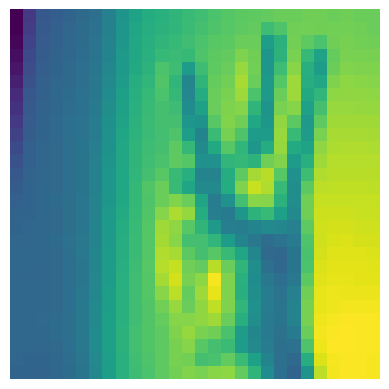

classification 23
image found of classification: 23 -


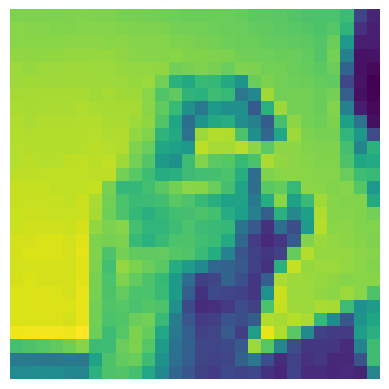

classification 24
image found of classification: 24 -


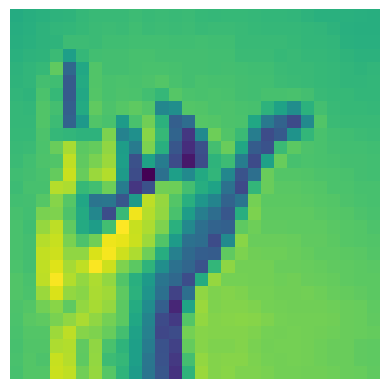

classification 25
for classification: 25 no suitable image found
for test serie
pc calculation: 0.9243285630268575
confusion matrix: [[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 270   0   4   0   0   0   0   0   0   3   0   0   0   0   0   5   3
    0   0   0   0   6   0   0   0]
 [  0   0 289   0   0   0   0   0   0   0   0   0   0   0   4   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0 226   0   0   0   0   0   0   0   0   0   0   0   0   0   5
    0   0   0   0   0   0   0   0]
 [  0   0   0   0 191   0   0   0   0   0   0   0   0   8   0   0  11   0
   24   0   0   0   0   0   0   0]
 [  0   0   0   0   0 245   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 246   0   0   0   0   0   0   0   0   0  18   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   7 168   0   0   0   0   0   0   0   0  26   0
    0   7   0   0   0   0   0 

C:\Users\melen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\melen\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


a great way to learn how a machine learning algorithm works is by implementing it from scratch


In [91]:
main()